In [17]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl


/home/yadongl1/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# data summary 

In [117]:
data_dir = '/extra/yadongl10/data/rat_odor/Processed/'
mouse = ['SuperChris', 'Stella', 'Mitt', 'Buchanan', 'Barat']
temp = 0
odor = 1

# get summary statistics. 
for subset in mouse:
    info = np.load(data_dir + subset +'/{}_trial_info.npy'.format(subset.lower()))
    temp += sum(info[:, 3]==odor)
    print('{} trials of {} has odor {}'.format(sum(info[:, 3]==odor), subset, odor))
print('in total {} trials of odor {}'.format(temp, odor)) 
    

65 trials of SuperChris has odor 1
65 trials of Stella has odor 1
83 trials of Mitt has odor 1
87 trials of Buchanan has odor 1
54 trials of Barat has odor 1
in total 354 trials of odor 1


# Spike train exploratory

In [118]:
subset = 'SuperChris'
st = np.load(data_dir + subset + '/{}_spike_data_binned.npy'.format(subset.lower()))
info = np.load(data_dir + subset +'/{}_trial_info.npy'.format(subset.lower()))
lfp_data = np.load(data_dir + subset +'/{}_lfp_data_sampled.npy'.format(subset.lower()))
print(st.shape, info.shape)

(245, 46, 400) (245, 4)


In [89]:
info[:, 0] # whether correct

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [90]:
info[:, 1] # whether inseq

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=uint8)

In [102]:
info[:, 2] # put order   

array([1, 1, 2, 3, 4, 5, 1, 2, 1, 2, 1, 2, 3, 4, 5, 1, 1, 2, 1, 2, 3, 4, 5,
       1, 2, 3, 4, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2,
       3, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5,
       1, 2, 3, 4, 1, 2, 3, 4, 5, 1, 2, 3, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1,
       2, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5,
       1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1,
       2, 3, 4, 5, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 1, 2, 3,
       4, 1, 2, 3, 4, 1, 2, 3, 4, 5, 1, 1, 2, 3, 4, 1, 2, 3, 4, 5, 1, 2, 3,
       5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 1, 2, 3,
       4, 5, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4,
       5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4], dtype=uint8)

In [119]:
info[:, 3]  # odor

array([1, 1, 2, 3, 4, 5, 1, 2, 1, 2, 1, 2, 3, 4, 5, 1, 1, 2, 1, 2, 3, 3, 5,
       1, 2, 5, 4, 1, 2, 1, 2, 5, 4, 5, 1, 2, 3, 4, 5, 1, 2, 1, 4, 5, 1, 2,
       3, 1, 2, 1, 2, 3, 4, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 5, 1, 2, 3, 1, 5,
       1, 2, 4, 4, 1, 2, 4, 4, 5, 1, 4, 3, 1, 4, 3, 4, 5, 1, 4, 3, 4, 5, 1,
       2, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 1, 1, 2, 3, 4, 5,
       1, 2, 3, 4, 2, 1, 5, 3, 4, 5, 1, 2, 1, 2, 3, 4, 5, 1, 2, 2, 4, 5, 1,
       2, 3, 4, 3, 1, 2, 1, 2, 3, 4, 5, 1, 3, 3, 4, 5, 1, 2, 3, 5, 1, 2, 3,
       5, 1, 2, 3, 5, 1, 2, 3, 5, 5, 1, 1, 2, 3, 4, 1, 2, 3, 4, 5, 1, 2, 3,
       5, 1, 2, 1, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 1, 5, 1, 2, 3, 4, 1, 2, 3,
       4, 2, 1, 2, 1, 2, 3, 4, 5, 1, 4, 3, 4, 5, 1, 4, 3, 4, 5, 1, 2, 5, 4,
       5, 1, 2, 3, 4, 5, 1, 2, 3, 3, 5, 1, 2, 3, 3], dtype=uint8)

In [121]:
np.sum(info[:, 3]<5 ) # odor

206

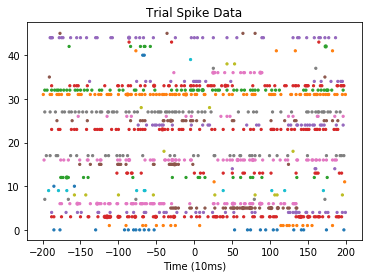

In [85]:
trial = 0
for i in range(st.shape[1]):
    plt.scatter(np.arange(400) - 200, np.ones(400) * i, s=st[trial, i,:] * 50)
plt.xlabel('Time (10ms)')
# plt.yticks([], [])
plt.title('Trial Spike Data')

(46, 400)


<Container object of 46 artists>

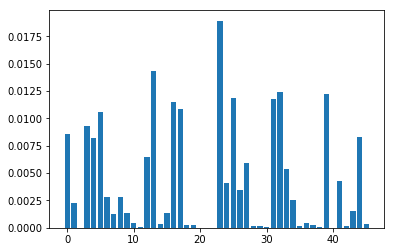

In [33]:
print(st.mean(axis=0).shape)
mean_act = st.mean(axis=0)[:, 200:250].mean(axis=1)
plt.bar(np.arange(46), mean_act)

In [54]:
def get_neuron_id(tetrode_id):
    tetrode_ids = [1, 12, 13, 14, 15, 16, 19, 2, 21, 22, 23, 7, 8, 9]
    tetrode_units = {1:3, 10:0, 12:1, 13:8, 14:4, 15:6, 16:1, 18:0, 19:4, 2:3,
                         20:0, 21:1, 22:5, 23:7, 3:0, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1}
    idx = 0
    for t in tetrode_ids:
        if t != tetrode_id:
            idx += tetrode_units[t]
        else:
            return np.arange(idx, idx + tetrode_units[t])
get_neuron_id(tetrode_id=23)

array([36, 37, 38, 39, 40, 41, 42])

In [48]:
mean_act[get_neuron_id(tetrode_id=19)]

array([ 0.01893061,  0.00413878,  0.01182041,  0.00342857])

In [50]:
mean_act.mean()
# plt.imshow(mean_act)

0.004301508429458741

In [115]:
def filter_trials(trial_info):
    """
    Get indices of correct in-sequence trials of odors A to D.
    """
    rat_correct = trial_info[:, 0] == 1
    in_sequence = trial_info[:, 1] == 1
    not_odor_e = trial_info[:, 3] < 5
    select = rat_correct & in_sequence & not_odor_e
    return select


def clean_data(trial_info, spike_data, lfp_data, training=False):
    """
    Clean up trials, remove cells that do not fire, and label targets.
    """
    trial_indices = filter_trials(trial_info)
    spike_data = spike_data[trial_indices]
    lfp_data = lfp_data[trial_indices]
    total_spike = np.sum(np.sum(spike_data[:, :, 200:300], axis=2), axis=0)
    spike_data = spike_data[:, total_spike > 0, :]
    target = trial_info[trial_indices, 3] - 1
    if training: 
        spike_data = np.sum(spike_data[:,:, 210:235], axis=2)
    return target, spike_data, lfp_data

# target, spike_data, lfp_data = clean_data(info, st, lfp_data)

# spike_data.shape, lfp_data.shape, target.shape

In [116]:
spike_data[:,:, 210:235].shape # from odor presentation: 100ms - 350ms, 10ms per unit. 

NameError: name 'spike_data' is not defined

In [114]:
def prepare_odor_data(subset = 'SuperChris'):
    data_dir = '/extra/yadongl10/data/rat_odor/Processed/'
    st = np.load(data_dir + subset + '/{}_spike_data_binned.npy'.format(subset.lower()))
    info = np.load(data_dir + subset +'/{}_trial_info.npy'.format(subset.lower()))
    lfp_data = np.load(data_dir + subset +'/{}_lfp_data_sampled.npy'.format(subset.lower()))
    target, spike_data, lfp_data = clean_data(info, st, lfp_data, training=True)
    return target, spike_data, lfp_data

target, spike_data, lfp_data = prepare_odor_data(subset = 'SuperChris')
target.shape, spike_data.shape, lfp_data.shape

NameError: name 'clean_data' is not defined

1. want an AE such that it can predict the label from the latent space representation. ==> the AE cannot take label as input. 

In [113]:
target

NameError: name 'target' is not defined

In [138]:
spike_data[target==0, :].mean(axis=0) * 1e2

array([ 14.31034483,   1.89655172,  19.31034483,  18.79310345,
        10.        ,   3.44827586,   3.79310345,  18.44827586,
         4.13793103,   2.75862069,   0.        ,  14.31034483,
         9.13793103,   0.17241379,   0.34482759,  26.37931034,
        14.31034483,   0.        ,   0.        ,  40.34482759,
         0.34482759,  21.37931034,   9.13793103,  20.17241379,
         0.17241379,   0.51724138,   0.17241379,  33.27586207,
        35.17241379,  12.06896552,   6.03448276,   0.51724138,
         0.        ,   0.        ,   0.51724138,  83.79310345,
         0.17241379,   3.44827586,   0.34482759,   3.10344828,
        14.82758621,   1.20689655])

In [139]:
spike_data[target==1, :].mean(axis=0) * 1e2

array([ 15.85365854,   7.56097561,  24.14634146,  20.24390244,
        56.09756098,   2.43902439,   1.2195122 ,   9.26829268,
         1.95121951,   1.2195122 ,   0.        ,  17.31707317,
        44.14634146,   1.46341463,   0.24390244,  26.09756098,
        25.36585366,   1.95121951,   0.24390244,  55.12195122,
        12.19512195,  32.68292683,   9.75609756,   9.02439024,
         0.48780488,   0.24390244,   0.        ,  32.43902439,
        28.29268293,  14.14634146,   5.85365854,   0.24390244,
         0.73170732,   0.48780488,   0.24390244,  27.56097561,
         0.        ,   7.80487805,   0.24390244,   3.65853659,
        17.56097561,   0.73170732])

In [141]:
spike_data[target==2, :].mean(axis=0) * 1e2

array([ 21.08108108,   6.48648649,  22.7027027 ,  25.94594595,
        12.43243243,  11.35135135,   2.7027027 ,   2.97297297,
         2.43243243,   0.27027027,   0.54054054,  17.56756757,
        51.89189189,   0.54054054,   0.54054054,  27.56756757,
        38.91891892,   0.54054054,   1.08108108,  49.45945946,
        13.78378378,  34.05405405,   9.18918919,  17.83783784,
         0.        ,   0.27027027,   0.        ,  29.45945946,
        27.2972973 ,   7.83783784,   5.67567568,   0.27027027,
         1.35135135,   0.        ,   0.        ,  18.37837838,
         0.        ,   8.64864865,   0.54054054,   4.05405405,
        22.16216216,   0.81081081])

In [196]:
spike_data.max()

1.5000000000000002

# plot latent 

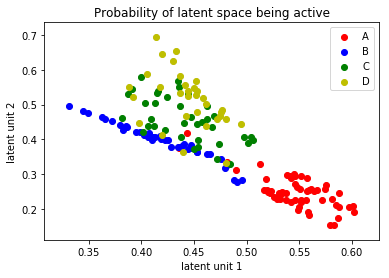

In [213]:
with open('latent.pkl', 'rb') as f:
    qz = pkl.load(f)
    
c = ['r', 'blue', 'g', 'y']
label = ['A', 'B', 'C', 'D']
plt.scatter(qz[:, 0], qz[:, 1], c='grey', alpha=0.2)

for i in range(4):
    plt.scatter(qz[target==i,0], qz[target==i, 1], c=c[i], label=label[i])
plt.legend()
plt.title('Probability of latent space being active')
plt.xlabel('latent unit 1')
plt.ylabel('latent unit 2')

plt.savefig('qz.png')    

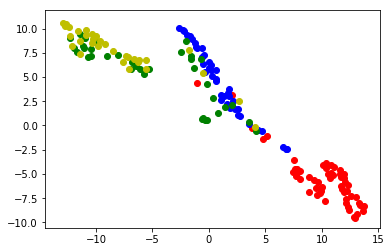

In [209]:
from sklearn.manifold import TSNE
qz_reduced = TSNE(n_components=2, random_state=0).fit_transform(qz)
for i in range(4):
    plt.scatter(qz_reduced[target==i,0], qz_reduced[target==i, 1], c=c[i], label=label[i])

In [221]:
truetheta = np.asarray([0.6, 1.2, 1.8, 2.4, 3])
np.stack([truetheta,truetheta])
np.concatenate([truetheta,truetheta])

array([ 0.6,  1.2,  1.8,  2.4,  3. ,  0.6,  1.2,  1.8,  2.4,  3. ])

latent dim: (168, 20)


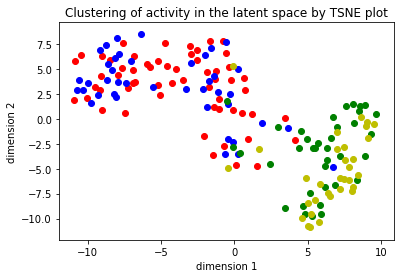

In [378]:
with open('qz.pkl', 'rb') as f:
    qz = pkl.load(f)
print('latent dim:', qz.shape) 
c = ['r', 'blue', 'g', 'y']
label = ['A', 'B', 'C', 'D']
# plt.scatter(qz[:, 0], qz[:, 1], c='grey', alpha=0.2)

# for i in range(4):
#     plt.scatter(qz[target==i,0], qz[target==i, 1], c=c[i], label=label[i])
# plt.legend()
# plt.title('Probability of latent space being active')
# plt.xlabel('latent unit 1')
# plt.ylabel('latent unit 2')
# plt.savefig('qz.png')
qz_reduced = TSNE(n_components=2, random_state=0).fit_transform(qz)
for i in range(4):
    plt.scatter(qz_reduced[target==i,0], qz_reduced[target==i, 1], c=c[i], label=label[i])
plt.title('Clustering of activity in the latent space by TSNE plot')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')    

latent dim: (168, 20)


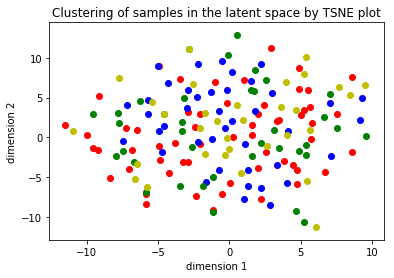

In [388]:
with open('latent.pkl', 'rb') as f:
    latent = pkl.load(f)
print('latent dim:', qz.shape) 
c = ['r', 'blue', 'g', 'y']
label = ['A', 'B', 'C', 'D']
# plt.scatter(latent[:, 0], latent[:, 1], c='grey', alpha=0.2)

# for i in range(4):
#     plt.scatter(qz[target==i,0], qz[target==i, 1], c=c[i], label=label[i])
# plt.legend()
# plt.title('Probability of latent space being active')
# plt.xlabel('latent unit 1')
# plt.ylabel('latent unit 2')
# plt.savefig('qz.png')
qz_reduced = TSNE(n_components=2, random_state=0).fit_transform(latent)
for i in range(4):
    plt.scatter(qz_reduced[target==i,0], qz_reduced[target==i, 1], c=c[i], label=label[i])
plt.title('Clustering of samples in the latent space by TSNE plot')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')  

In [382]:
np.log(0.05/0.95)

-2.9444389791664403

In [411]:
(np.arange(2) == odor[:,None]).astype(np.float32)[:10]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

In [403]:
info = np.load(data_dir + 'SuperChris' +'/{}_trial_info.npy'.format(subset.lower()))
odor = info[:, 3] - 1
odor

array([0, 0, 1, 2, 3, 4, 0, 1, 0, 1, 0, 1, 2, 3, 4, 0, 0, 1, 0, 1, 2, 2, 4,
       0, 1, 4, 3, 0, 1, 0, 1, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 0, 3, 4, 0, 1,
       2, 0, 1, 0, 1, 2, 3, 3, 0, 1, 2, 3, 3, 0, 1, 2, 3, 4, 0, 1, 2, 0, 4,
       0, 1, 3, 3, 0, 1, 3, 3, 4, 0, 3, 2, 0, 3, 2, 3, 4, 0, 3, 2, 3, 4, 0,
       1, 0, 1, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 1, 0, 4, 2, 3, 4, 0, 1, 0, 1, 2, 3, 4, 0, 1, 1, 3, 4, 0,
       1, 2, 3, 2, 0, 1, 0, 1, 2, 3, 4, 0, 2, 2, 3, 4, 0, 1, 2, 4, 0, 1, 2,
       4, 0, 1, 2, 4, 0, 1, 2, 4, 4, 0, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2,
       4, 0, 1, 0, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 0, 4, 0, 1, 2, 3, 0, 1, 2,
       3, 1, 0, 1, 0, 1, 2, 3, 4, 0, 3, 2, 3, 4, 0, 3, 2, 3, 4, 0, 1, 4, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 2, 4, 0, 1, 2, 2], dtype=uint8)

# inseq vs out seq 

## add bias version

In [996]:
result_dir = '/extra/yadongl10/git_project/nlpresult/rat_exp'
with open(result_dir + '/SuperChris_selection_by_odor_prior{}.pkl'.format('mom'), 'rb') as f:
    mask_by_odor = pkl.load(f)
np.savetxt(result_dir + '/SuperChris_selection_by_odor_prior{}.txt'.format('mom'), mask_by_odor)


In [978]:
mask_by_odor.round(3)

array([[ 0.   ,  0.319,  0.015,  0.   ,  0.   ,  0.049,  0.018,  0.   ,
         0.018,  0.016,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.545,
         0.368,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.381,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.04 ,  0.019,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.445,  0.01 ,  0.03 ,
         0.   ,  0.01 ,  0.   ,  0.   ],
       [ 0.   ,  0.091,  0.015,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.073,  0.02 ,  0.   ,  0.   ,  0.   ,  0.072,  0.   ,  0.   ,
         0.083,  0.   ,  0.   ,  0.   ,  0.   ,  0.257,  0.13 ,  0.   ,
         0.019,  0.   ,  0.   ,  0.   ,  0.   ,  0.308,  0.   ,  0.655,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.01 ,  0.02 ,
         0.   ,  0.01 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.015,  0.   ,  0.   ,  0.161,  0.315,  0.035,
         0.   ,  0.007,  0.   ,  0.   ,  0.   ,  0.944,  0.   ,  0.   ,
         0.444,  0.   ,  0.   ,  0.   ,  0.   ,  0.   

In [982]:
(spike_data[target==1, :].mean(axis=0)).round(3)

array([ 0.159,  0.076,  0.241,  0.202,  0.561,  0.024,  0.012,  0.093,
        0.02 ,  0.012,  0.   ,  0.173,  0.441,  0.015,  0.002,  0.261,
        0.254,  0.02 ,  0.002,  0.551,  0.122,  0.327,  0.098,  0.09 ,
        0.005,  0.002,  0.   ,  0.324,  0.283,  0.141,  0.059,  0.002,
        0.007,  0.005,  0.002,  0.276,  0.   ,  0.078,  0.002,  0.037,
        0.176,  0.007])

In [976]:
def compute_implied_fdr(threshold, s):
    """
    Args:
        s: predicted probability
        threshold: level greater than threshold are selected

    Returns:
        fdr corresponding to the threshold
    """
    indicator = np.asarray([s > threshold])
    return np.sum((1 - s) * indicator) / np.sum(indicator)


def search_threshold(s, fdr):
    """
    Args:
        s: predicted probability
        fdr: controlled false discovery rate level

    Returns:
        largest threshold such that the fdr is less than the controlled level: fdr
    """
    for threshold in np.linspace(0, 1, 101):
        if compute_implied_fdr(threshold, s) < fdr:
            break
    return threshold


for i in range(4):
    threshold = search_threshold(mask_by_odor[i], 0.05)
    print(threshold)
    np.where(mask_by_odor[i] > threshold)    
    

1.0
0.66
0.53
0.58


/home/yadongl1/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [986]:
for i in range(4):
    print(mask_by_odor[i].argsort()[-10:][::-1])

[15 37 22 16  1  5 29 39 30  6]
[ 6 31 29 21 22  1 16  8 13 39]
[31 13 29 16  6 22  5 35 28 40]
[31  5 42 13  1 29  6  8 16  2]


## no bias

In [987]:
result_dir = '/extra/yadongl10/git_project/nlpresult/rat_exp'
with open(result_dir + '/SuperChris_selection_by_odor_prior{}_no_bias.pkl'.format('mom'), 'rb') as f:
    mask_by_odor_no_bias = pkl.load(f)
np.savetxt(result_dir + '/SuperChris_selection_by_odor_prior{}_no_bias.txt'.format('mom'), mask_by_odor)

for i in range(4):
    print(mask_by_odor_no_bias[i].argsort()[-10:][::-1])

[37 15 30  1 16 34 25  6 22  5]
[ 6 29 31 13 34 30 24 17  8 37]
[31 13 23  6  5 34 29 16 25 21]
[31 13  5 42 21  1  6 25 34 29]


In [988]:
mask_by_odor_no_bias[0].shape

(44,)

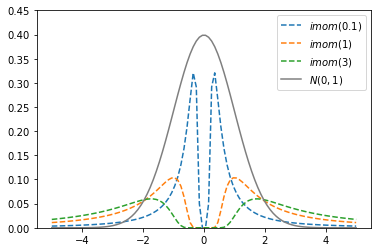

In [112]:
def mom_pdf(x, phi, tau=0.358):
    return x**2*1/tau*(1/np.sqrt(2*np.pi*tau*phi))*np.exp(-x**2/(2*tau*phi))

def normal_pdf(x, var=10):
    return 1/np.sqrt(2*np.pi * var) * np.exp(- x**2/(2*var)) 

def imom_pdf(x, phi=1, tau=3):  #0.133
    return 0.5*np.sqrt(tau*phi/np.pi) / (x**2) * np.exp(-(tau*phi) / (x**2)) 

def pemom_pdf(x, phi=1, tau=3):
    return np.exp(np.sqrt(2) - tau / x**2) * 1/np.sqrt(2*np.pi*tau*phi) * np.exp(- x**2/(2*tau*phi)) 
# fig = plt.figure(figsize=(8, 5))
# ax = fig.add_subplot(111)

ranges = 5
grid = np.linspace(-ranges, ranges, 100)
# plt.arrow(0., 0, 0, 0.2, length_includes_head=True)

# plt.plot(grid,  mom_pdf(grid, phi=1, tau=0.358), color='b', label='tau 0.358')
# plt.plot(grid,  mom_pdf(grid, phi=1, tau=0.5), color='purple', label='$mom(1)$', linestyle='-.')
scale = 1
plt.plot(grid, scale* imom_pdf(grid, phi=1, tau=0.1), color='C0', label='$imom(0.1)$', linestyle='--')
plt.plot(grid, scale* imom_pdf(grid, phi=1, tau=1), color='C1', label='$imom(1)$', linestyle='--')
plt.plot(grid, scale* imom_pdf(grid, phi=1, tau=3), color='C2', label='$imom(3)$', linestyle='--')

plt.plot(grid,  normal_pdf(grid, var=1), color='C7', label='$N(0, 1)$')
plt.ylim(0, 0.45)

plt.legend() 
# plt.title()

In [462]:
nlp_pdf(10, phi=1, tau=5)

0.00016199821912178235

In [548]:
imom_pdf(0.1, phi=1, tau=5)

4.4940626093671276e-216

In [455]:
normal_pdf(20, var=10)

2.6002818688271939e-10

In [472]:
a = []
a.append(1.)

In [473]:
a

[1.0]

In [ ]:
def filter_nan(sse_nonzero_best_ls):
    for i, s in enumerate(sse_nonzero_best_ls):
        if sse_nonzero_best_ls[i] > 2.:
            del sse_nonzero_best_ls[i]
    return sse_nonzero_best_ls


In [1001]:
alter_priors = ['mom', 'imom', 'Gaussian']
alter_prior = 'imom'

tau = 10

for p in [500, 1000, 1500]:  # [100, 500, 1000]
    for phi in [4]:  #[1, 4, 8]
        sse_best = []
        print('n {}, p {}, phi {}, alter_prior {}'.format(100, p, phi, alter_prior))
        for rep in range(10):
            result_dir = '/extra/yadongl10/git_project/nlpresult/0203/adam_001/{}'.format(alter_prior)
            with open(result_dir + '/{}_sse_nonzero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior, p, phi, rep), 'rb') as f:
                sse_nonzero_best = np.asarray(pkl.load(f))[-1]
            with open(result_dir + '/{}_sse_zero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior, p, phi, rep), 'rb') as f:
                sse_zero_best = np.asarray(pkl.load(f))[-1]
            temp = sse_nonzero_best + sse_zero_best
#             if temp < 1:
            sse_best.append(temp)
        print( '\n', np.asarray(sse_best).mean())
        print('best mse {}'.format(np.asarray(sse_best)), '\n')
        
        
        
        

n 100, p 500, phi 4, alter_prior imom

 1.7464461416
best mse [ 1.70776045  3.54116666  2.33699763  1.33134776  0.69990012  1.56754887
  1.13042367  1.51853099  2.873335    0.75745025] 

n 100, p 1000, phi 4, alter_prior imom

 0.459610100091
best mse [ 0.43018165  0.19792417  0.72859281  0.87482148  0.33282855  0.4864825
  0.22231171  0.3655763   0.55051309  0.40686874] 

n 100, p 1500, phi 4, alter_prior imom

 0.745596787792
best mse [ 0.10771973  0.53203815  1.10604632  1.1843406   0.55561781  1.08486176
  0.0952795   0.61493716  1.98246855  0.19265831] 



In [949]:
sse_zero_best.shape# sse_zero_best
# sse_nonzero_best

()

In [1150]:
alter_priors = ['mom', 'imom', 'Gaussian']
alter_prior = 'mom'

tau = 10
for p in [500, 1000, 1500]:  # [100, 500, 1000]
    for phi in [4]:  #[1, 4, 8]
        result_dir = '/extra/yadongl10/git_project/nlpresult/0203/{}'.format(alter_prior)
        with open(result_dir + '/p{}_phi{}_sse_nonzero_best_ls_{}_tau{}.pkl'.format(p, phi, 9, alter_prior, tau), 'rb') as f:
            sse_nonzero_best_ls = pkl.load(f)
            sse_nonzero_best_ls = filter_nan(sse_nonzero_best_ls)
            print(np.mean(sse_nonzero_best_ls), '\n')
            print(sse_nonzero_best_ls, '\n')

1.2245862186 

[1.341729760169983, 2.8208792209625244, 2.01495623588562, 0.14416146278381348, 1.3041770458221436, 0.6236340403556824, 0.8058640956878662, 0.741287887096405] 

11.3985038996 

[5.695040225982666, 24.02244758605957, 0.9443029165267944, 2.999756097793579, 23.33097267150879] 

8.73610452563 

[1.696083426475525, 0.17515800893306732, 40.570152282714844, 6.233739852905273, 1.5180686712265015, 2.2234249114990234] 



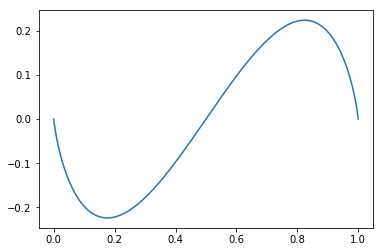

In [545]:
def derivative(x):
    return x*(1-x) * np.log(x/(1-x))
grid = np.linspace(1e-5, 1-1e-5, 1000)
plt.plot(grid, derivative(grid))

2.571596622467041

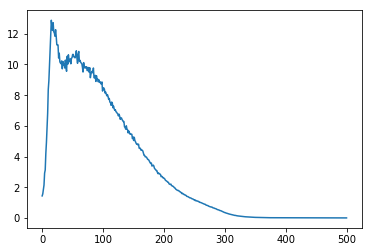

In [674]:
# data_dir = '/extra/yadongl10/git_project/sandbox/nonlocal_vi'
data_dir = '/extra/yadongl10/git_project/nlpresult/0203/imom'
alter_prior = 'imom'
with open(data_dir + '/{}_sse_zero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior, 500, 1, 1), 'rb') as f:
    sse_zero_list = pkl.load(f)
plt.plot(sse_zero_list[:500], label=alter_prior)
sse_zero_list[200]

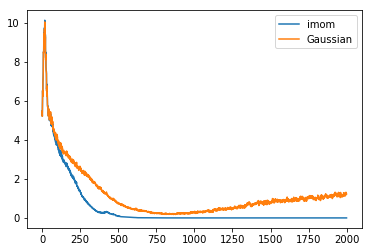

In [905]:
data_dir = '/extra/yadongl10/git_project/nlpresult/0203/adam_001'
fig, axe = plt.subplots()

for alter_prior in ['imom', 'Gaussian']: # , "mom"
    with open(data_dir + '/{}/{}_sse_zero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior,alter_prior, 1500, 4, 2), 'rb') as f:
        sse_zero_list = pkl.load(f)
    plt.plot(sse_zero_list[:2000], label=alter_prior)
plt.legend()

In [906]:
sse_zero_list[-1]

1.78488290309906

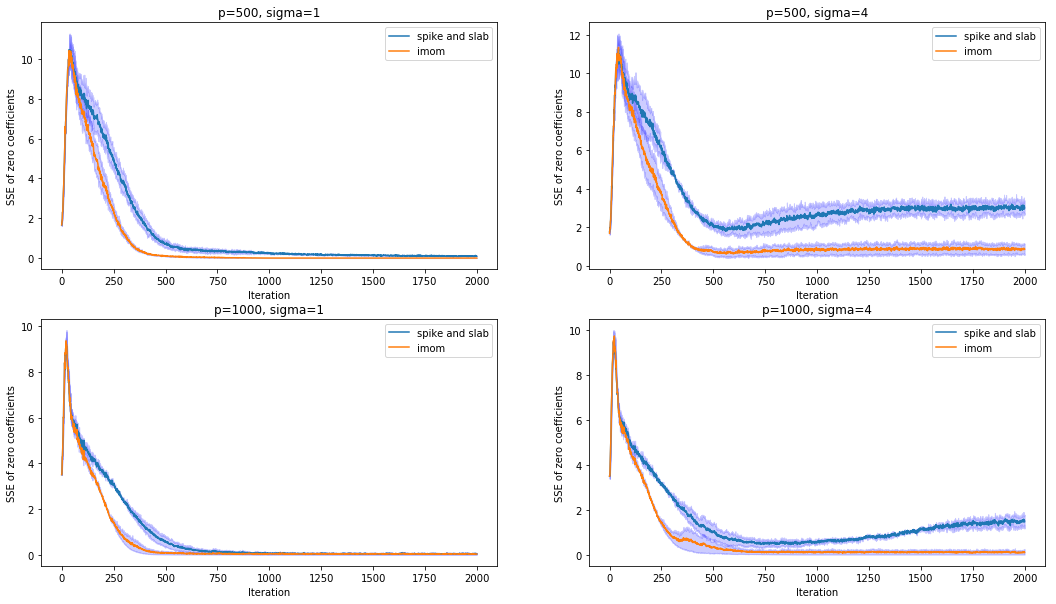

In [1327]:
data_dir = '/extra/yadongl10/git_project/nlpresult/0203/adam_001'
fig, axe = plt.subplots(2,2,figsize=(18,10))
timesteps = 2000
prior_name = ['spike and slab', 'inverse mom']
grid = np.arange(timesteps)
for i in range(2):
    for j in range(2): 
        for alter_prior in ['Gaussian', 'imom']: # , 'mom'
            sse_zero = np.empty((10, timesteps))
            phi = 1
            if j == 1:
                phi = 4
            for rep in range(10):
                with open(data_dir + '/{}/{}_sse_zero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior,alter_prior, (i+1)*500, phi, rep), 'rb') as f:
                    sse_zero_list = pkl.load(f)
                    sse_zero[rep, :] = sse_zero_list[:timesteps]
            sse_zero = sse_zero[::5]
            if alter_prior == 'Gaussian':
                prior_name = 'spike and slab'
            else:
                prior_name = alter_prior
                
            axe[i,j].plot(sse_zero.mean(axis=0), label=prior_name)
            axe[i,j].fill_between(grid, sse_zero.min(axis=0), sse_zero.max(axis=0), color='blue', alpha=.2)
            plt.legend()
            axe[i, j].set_title('p={}, sigma={}'.format((i+1)*500, phi))
            axe[i, j].set(xlabel='Iteration', ylabel='SSE of zero coefficients')
            axe[i, j].legend()

            
            

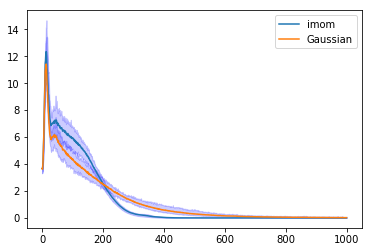

In [737]:
data_dir = '/extra/yadongl10/git_project/nlpresult/0203'
fig, axe = plt.subplots()
timesteps = 1000
grid = np.arange(timesteps)
for alter_prior in ['imom', 'Gaussian']: # , 'mom'
    sse_zero = np.empty((10, timesteps))
    for rep in range(10):
        with open(data_dir + '/{}/{}_sse_zero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior,alter_prior, 1000, 1, rep), 'rb') as f:
            sse_zero_list = pkl.load(f)
            sse_zero[rep, :] = sse_zero_list[:timesteps]
    sse_zero = sse_zero[::1]
    axe.plot(sse_zero.mean(axis=0), label=alter_prior, )
    axe.fill_between(grid, sse_zero.min(axis=0), sse_zero.max(axis=0), color='blue', alpha=.2)
plt.legend()

# Another look at SSE

# rho 0 phi 4

In [1407]:
# not learned Gaussian
alter_prior = 'Gaussian'
result_dir = '/extra/yadongl10/git_project/nlpresult/0204/adam005_init0_tau10/{}'.format(alter_prior)

tau = 10
for p in [500, 1000, 1500]:  # [100, 500, 1000]
    for phi in [4]:  #[1, 4, 8]
        with open(result_dir + '/p{}_phi{}_sse_theta_ls_tau{}.pkl'.format(p, phi, tau), 'rb') as f:
            sse_theta = np.asarray(pkl.load(f))[:,0]  # col for sse total 
            print('p {}, phi {}, sse {:.3f} std {:.3f}'.format(p, phi, sse_theta.mean(axis=0), sse_theta.std(axis=0)))
        


p 500, phi 4, sse 6.072 std 2.759
p 1000, phi 4, sse 3.243 std 1.289
p 1500, phi 4, sse 3.486 std 2.382


In [1275]:
sse_theta
def filter_nan(sse_nonzero_best_ls):
    for i, s in enumerate(sse_nonzero_best_ls):
        if sse_nonzero_best_ls[i] > 4.:
            del sse_nonzero_best_ls[i]
    return sse_nonzero_best_ls
np.asarray(filter_nan(sse_theta.tolist())).mean()

1.6969622820615768

In [1411]:
# learned imom
alter_prior = 'imom'
result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam005_init0_tau10_learned/{}'.format(alter_prior)
tau = 10
for p in [500, 1000, 1500]:  # [100, 500, 1000]
    for phi in [4]:  #[1, 4, 8]
        with open(result_dir + '/p{}_phi{}_sse_theta_ls_tau{}.pkl'.format(p, phi, tau), 'rb') as f:
            sse_theta = np.asarray(pkl.load(f))[:,0]
            print('p {}, phi {}, sse {:.3f} std {:.3f}'.format(p, phi, sse_theta.mean(axis=0), sse_theta.std(axis=0)))
        


p 500, phi 4, sse 0.501 std 0.436
p 1000, phi 4, sse 0.560 std 0.363
p 1500, phi 4, sse 0.332 std 0.273


In [ ]:
# learned Gaus


# rho 025 phi 1, 4

In [1418]:
# not learned imom
alter_prior = 'imom'
# result_dir = '/extra/yadongl10/git_project/nlpresult/0204/adam005_init0_tau10/{}'.format(alter_prior)
result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam005_init0_tau10_rho025_notlearned/{}'.format(alter_prior)
tau = 10
for p in [500, 1000, 1500]:  # [100, 500, 1000]
    for phi in [1]:  #[1, 4, 8]
        with open(result_dir + '/p{}_phi{}_sse_theta_ls_tau{}.pkl'.format(p, phi, tau), 'rb') as f:
            sse_theta = np.asarray(pkl.load(f))[:,1]
#             sse_theta = np.asarray(filter_nan(sse_theta.tolist()))
            print('p {}, phi {}, sse {:.3f} std {:.3f}'.format(p, phi, sse_theta.mean(axis=0), sse_theta.std(axis=0)))
    
    


p 500, phi 1, sse 0.279 std 0.300
p 1000, phi 1, sse 0.366 std 0.403
p 1500, phi 1, sse 1.195 std 1.469


In [1421]:
# learned hard concrete
alter_prior = 'imom'
result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam001_init0_tau10_rho025_learned/{}'.format(alter_prior)
tau = 10
for p in [500, 1000, 1500]:  # [100, 500, 1000]
    for phi in [4]:  #[1, 4, 8]
        with open(result_dir + '/p{}_phi{}_sse_theta_ls_tau{}.pkl'.format(p, phi, tau), 'rb') as f:
            sse_theta = np.asarray(pkl.load(f))[:,2]
            print('p {}, phi {}, sse {:.3f} std {:.3f}'.format(p, phi, sse_theta.mean(axis=0), sse_theta.std(axis=0)))
        


p 500, phi 4, sse 0.000 std 0.000
p 1000, phi 4, sse 0.017 std 0.050
p 1500, phi 4, sse 0.000 std 0.000


In [1644]:
alter_prior = 'Gaussian'
result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam005_init0_tau10_rho025_learned/{}'.format(alter_prior)
tau = 10
for p in [500, 1000, 1500]:  # [100, 500, 1000]
    for phi in [1]:  #[1, 4, 8]
        with open(result_dir + '/p{}_phi{}_sse_theta_ls_tau{}.pkl'.format(p, phi, tau), 'rb') as f:
            sse_theta = np.asarray(pkl.load(f))[:,0]
#             if p == 500: 
#                 sse_theta = np.asarray(filter_nan(sse_theta.tolist()))
#             print(sse_theta)
            print('p {}, phi {}, sse {:.3f} std {:.3f}'.format(p, phi, sse_theta.mean(axis=0), sse_theta.std(axis=0)))
        


p 500, phi 1, sse 0.128 std 0.130
p 1000, phi 1, sse 0.101 std 0.070
p 1500, phi 1, sse 0.074 std 0.045


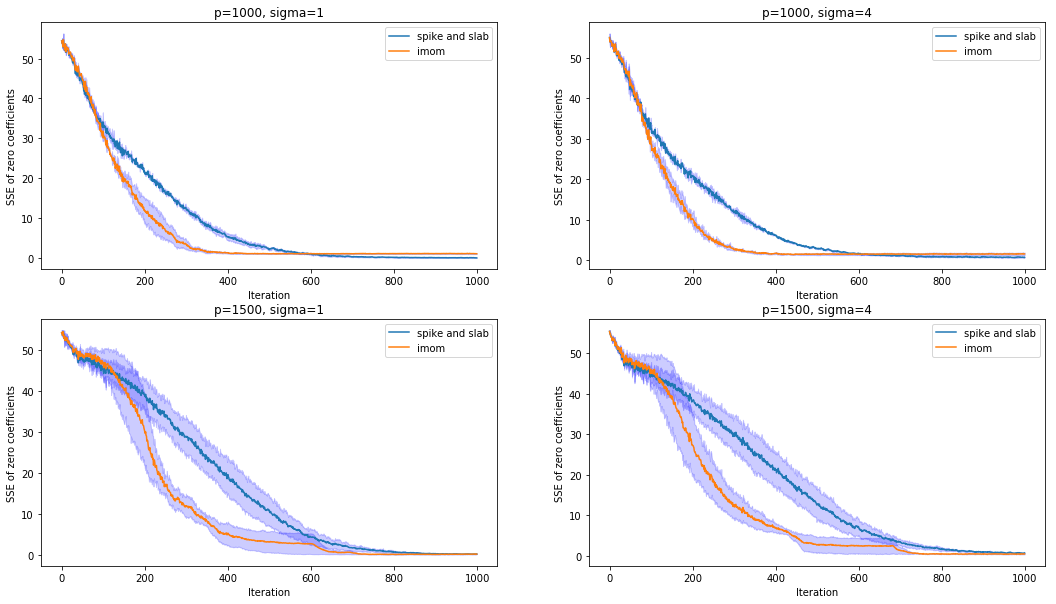

In [1330]:
data_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam001_init0_tau10_rho025_learned'
fig, axe = plt.subplots(2,2,figsize=(18,10))
timesteps = 1000
prior_name = ['spike and slab', 'inverse mom']
grid = np.arange(timesteps)
for i in range(2):
    for j in range(2): 
        for alter_prior in ['Gaussian', 'imom']: # , 'mom'
            sse_zero = np.empty((10, timesteps))
            phi = 1
            if j == 1:
                phi = 4
            for rep in range(10):
                with open(data_dir + '/{}/{}_sse_nonzero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior,alter_prior, (i+1)*500, phi, rep), 'rb') as f:
                    sse_zero_list = pkl.load(f)
                    sse_zero[rep, :] = sse_zero_list[:timesteps]
            sse_zero = sse_zero[::5]
            if alter_prior == 'Gaussian':
                prior_name = 'spike and slab'
            else:
                prior_name = alter_prior
                
            axe[i,j].plot(sse_zero.mean(axis=0), label=prior_name)
            axe[i,j].fill_between(grid, sse_zero.min(axis=0), sse_zero.max(axis=0), color='blue', alpha=.2)
            plt.legend()
            axe[i, j].set_title('p={}, sigma={}'.format((i+2)*500, phi))
            axe[i, j].set(xlabel='Iteration', ylabel='SSE of zero coefficients')
            axe[i, j].legend()

            
   

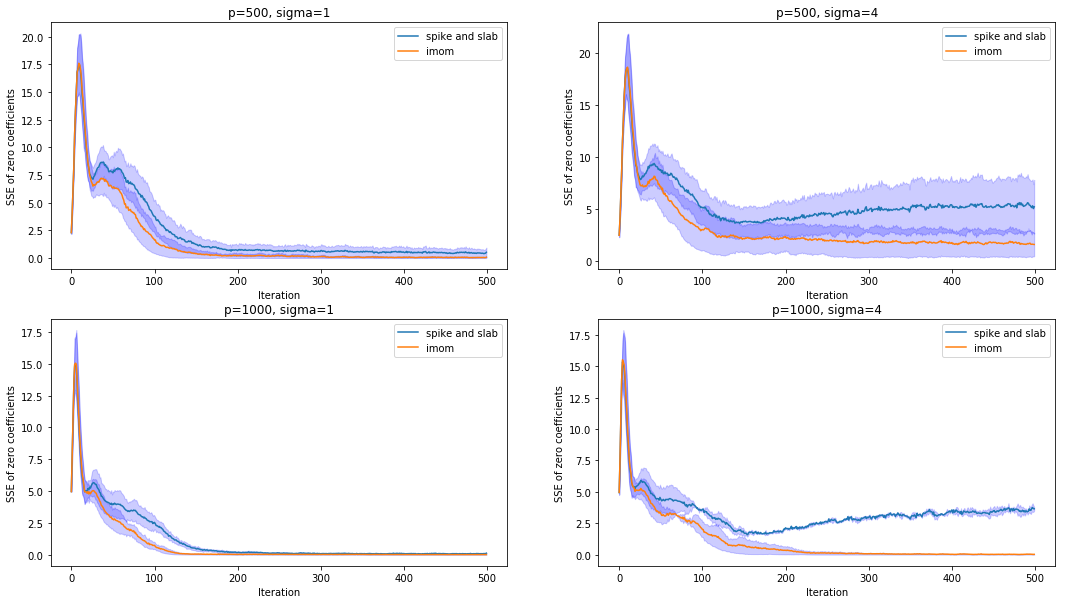

In [1321]:
data_dir = '/extra/yadongl10/git_project/nlpresult/0204/adam005_init0_tau10'
fig, axe = plt.subplots(2,2,figsize=(18,10))
timesteps = 500
prior_name = ['spike and slab', 'inverse mom']
grid = np.arange(timesteps)
for i in range(2):
    for j in range(2): 
        for alter_prior in ['Gaussian', 'imom']: # , 'mom'
            sse_zero = np.empty((10, timesteps))
            phi = 1
            if j == 1:
                phi = 4
            for rep in range(10):
                with open(data_dir + '/{}/{}_sse_zero_list_p{}_phi{}_repeat{}.pkl'.format(alter_prior,alter_prior, (i+1)*500, phi, rep), 'rb') as f:
                    sse_zero_list = pkl.load(f)
                    sse_zero[rep, :] = sse_zero_list[:timesteps]
            sse_zero = sse_zero[::5]
            if alter_prior == 'Gaussian':
                prior_name = 'spike and slab'
            elif alter_prior == 'imom':
                prior_name = 'imom'
                
            axe[i,j].plot(sse_zero.mean(axis=0), label=prior_name)
            axe[i,j].fill_between(grid, sse_zero.min(axis=0), sse_zero.max(axis=0), color='blue', alpha=.2)
            plt.legend()
            axe[i, j].set_title('p={}, sigma={}'.format((i+1)*500, phi))
            axe[i, j].set(xlabel='Iteration', ylabel='SSE of zero coefficients')
            axe[i, j].legend()

            
            

In [1066]:
imom_test_acc = np.asarray([0.9459459781646729
,1.0
,0.9459459781646729
,0.9729729890823364
,0.9459459781646729])
mom_test_acc = np.asarray([1.0, 0.9729729890823364, 0.9459459781646729, 0.9729729890823364, 0.9459459781646729])
Gaussian_test_acc = np.asarray([0.9729729890823364, 0.9729729890823364, 0.9459459781646729, 0.9459459781646729, 0.9459459781646729])

Gaussian_test_acc.mean(), mom_test_acc.mean(), imom_test_acc.mean()




(0.95675678253173824, 0.96756758689880373, 0.96216218471527104)

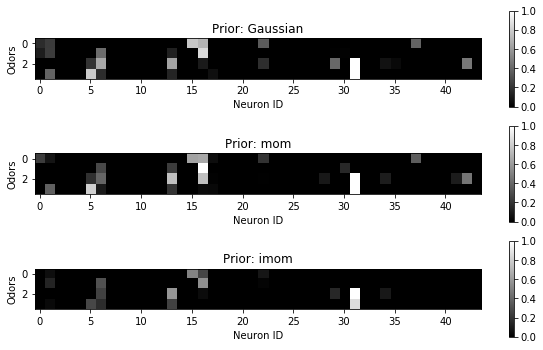

In [1147]:
result_dir = '/extra/yadongl10/git_project/nlpresult/rat_exp/cross_valid'
config = {'alter_prior': 'mom',  # Gaussian, mom, imom
              'p': 0.1,
              'epochs': 1000}
rep = 2
mask_by_odor_total = np.zeros((5, 4, 44))
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,6))

# fig, axe = plt.subplots(3,1,figsize=(6,6))
for j, prior in enumerate(['Gaussian', 'mom', 'imom']):
    for i in range(5):
        with open(result_dir + '/SuperChris_selection_by_odor_p{}_prior{}_repeat{}.pkl'.format(config['p'], prior, rep), 'rb') as f:
            mask_by_odor = pkl.load(f)
            mask_by_odor_total[i] = mask_by_odor
    ax = fig.add_subplot(311 + j)
    im = ax.imshow(mask_by_odor_total.mean(axis=0), cmap='gray')
    ax.set(xlabel='Neuron ID', ylabel='Odors')
#     im = axe[j].imshow(mask_by_odor_total.mean(axis=0), cmap='gray')
    fig.colorbar(im, ax=ax)
    ax.set_title('Prior: {}'.format(prior))

    

In [1079]:
mask_by_odor.shape

(4, 44)

In [1081]:
np.stack([mask_by_odor,mask_by_odor]).shape

(2, 4, 44)

In [ ]:
alter_prior = 'imom'
result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam005_init0_tau10_rho025_notlearned/{}'.format(alter_prior)
with open(data_dir + '/{}/p{}_phi{}_repeat{}.pkl'.format(alter_prior,alter_prior, (i+1)*500, phi, rep), 'rb') as f:
    sse_zero_list = pkl.load(f)
    
    
    

In [212]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def get_pre_recall(true_theta, theta):
    theta_binary = np.asarray([x>0 for x in theta], dtype=int)
    precision =  np.sum(true_theta[theta > 0]) / np.sum(theta > 0)
    recall =  np.sum(theta_binary[true_theta > 0]) / np.sum(true_theta > 0)
    return precision, recall


def compute_sse(true_theta, theta):
    return np.sum((true_theta- theta)**2)


def get_avg_prec_recall(result_dir, phi, repeat=10):
    results = np.zeros((3, repeat, 2))  # p, rep, metric
    for i, p in enumerate([500, 1000, 1500]):
        true_theta = np.zeros(p)
        true_theta[-5:] = np.ones(5)
#         print('config p {}, phi{}'.format(p, phi))
        for rep in range(repeat):
            if not 'mcmc' in result_dir:
                with open(result_dir + '/p{}_phi{}_repeat{}.pkl'.format(p, phi, rep), 'rb') as f:
                    theta = pkl.load(f)
            else:
                theta = np.loadtxt(result_dir + 'repeat{}_p{}_n100_rho0.25_phi{}.txt'.format(rep+1, p, phi), skiprows=1, usecols=1)
            results[i, rep, :] = get_pre_recall(true_theta, theta)
        
    return results
        
def get_sse(result_dir, phi, tau=10, repeat=10):
    sse_theta_p = []
    for i, p in enumerate([500, 1000, 1500]):
        if not 'mcmc' in result_dir:
            with open(result_dir + '/p{}_phi{}_sse_theta_ls_tau{}.pkl'.format(p, phi, tau), 'rb') as f:
                sse_theta = np.asarray(pkl.load(f))[:,0].mean() # (rep) - > (1)
                sse_theta_p.append(sse_theta)
        else:
            sse = 0
            for rep in range(repeat):
                true_theta = np.zeros(p)
                true_theta[-5:] = np.arange(5) + 1
                theta = np.loadtxt(result_dir + 'repeat{}_p{}_n100_rho0.25_phi{}.txt'.format(rep+1, p, phi), skiprows=1, usecols=1)
                sse += compute_sse(true_theta, theta)
            sse /= repeat
            sse_theta_p.append(sse)
            
    return np.asarray(sse_theta_p).round(3)

def result2str(sse, pre_rec):
    result = []
    for i in range(3):
        result.append(str(sse[i]))
        result.append(" (".join([str(j) for j in pre_rec[i]]) + ')')
    return " & ".join(result)

In [213]:
alter_prior = 'imom'
result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam005_init0_tau10_rho025_learned/{}'.format(alter_prior)
# result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam005_init0_tau10_rho025_notlearned/{}'.format(alter_prior)
result = ''
for phi in [1, 4]:
    pre_rec = get_avg_prec_recall(result_dir, phi).mean(axis=1).round(3).tolist()
    sse = get_sse(result_dir, phi, tau=10).tolist()
    result = result +' & ' + result2str(sse, pre_rec)
print(result)
    
    

 & 0.353 & 1.0 (0.96) & 0.523 & 1.0 (0.92) & 0.67 & 1.0 (0.9) & 0.526 & 1.0 (0.96) & 0.941 & 0.98 (0.9) & 0.937 & 1.0 (0.88)


In [1639]:
result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam001_init0_tau10_rho025_learned/{}'.format(alter_prior)
# result_dir = '/extra/yadongl10/git_project/nlpresult/0205/adam005_init0_tau10_rho025_notlearned/{}'.format(alter_prior)
result = ''
for phi in [1, 4]:
    pre_rec = get_avg_prec_recall(result_dir, phi).mean(axis=1).round(3).tolist()
    sse = get_sse(result_dir, phi, tau=10).tolist()
    result = result +' & ' + result2str(sse, pre_rec)
print(result)

 & 0.086 & 0.933 (1.0) & 0.291 & 0.907 (0.98) & 1.26 & 0.918 (0.86) & 2.104 & 0.478 (0.98) & 1.339 & 0.659 (0.92) & 2.26 & 0.783 (0.86)


In [1645]:
sigma = 0.2 * np.ones((5, 5))
np.fill_diagonal(sigma, 1)

In [1646]:
sigma

array([[ 1. ,  0.2,  0.2,  0.2,  0.2],
       [ 0.2,  1. ,  0.2,  0.2,  0.2],
       [ 0.2,  0.2,  1. ,  0.2,  0.2],
       [ 0.2,  0.2,  0.2,  1. ,  0.2],
       [ 0.2,  0.2,  0.2,  0.2,  1. ]])

# MCMC results

In [211]:
method = ['simmom1','simimom1', 'simlasso', 'simscad', 'simadalasso']
mcmc_dir = '/extra/yadongl10/git_project/nlpresult/mcmc/est/{}_'.format('simlasso')
a = np.loadtxt(mcmc_dir + 'repeat1_p1500_n100_rho0.25_phi1.txt', skiprows=1, usecols=1)
result = ''
for phi in [1, 4]:
    pre_rec = get_avg_prec_recall(mcmc_dir, phi).mean(axis=1).round(3).tolist()
    sse = get_sse(mcmc_dir, phi, tau=10).tolist()
    result = result +' & ' + result2str(sse, pre_rec)
print(result)

 & 0.468 & 0.2 (1.0) & 0.671 & 0.155 (1.0) & 0.735 & 0.151 (1.0) & 1.94 & 0.195 (1.0) & 2.706 & 0.154 (1.0) & 2.941 & 0.15 (0.98)


In [217]:
mcmc_dir = '/extra/yadongl10/git_project/nlpresult/mcmc/est/{}_'.format('imom')
a = np.loadtxt(mcmc_dir + 'repeat1_p1500_n100_rho0.25_phi1.txt', skiprows=1, usecols=1)
result = ''
for phi in [1, 4]:
    pre_rec = get_avg_prec_recall(mcmc_dir, phi, repeat=5).mean(axis=1).round(3).tolist()
    sse = get_sse(mcmc_dir, phi, tau=10, repeat=5).tolist()
    result = result +' & ' + result2str(sse, pre_rec)
print(result)

 & 0.037 & 1.0 (1.0) & 0.052 & 1.0 (1.0) & 0.127 & 1.0 (1.0) & 1.306 & 1.0 (0.8) & 1.285 & 1.0 (0.84) & 1.521 & 1.0 (0.84)


In [200]:
def get_pre_recall(true_theta, theta):
    theta_binary = np.asarray([x>0 for x in theta], dtype=int)
    precision =  np.sum(true_theta[theta > 0]) / np.sum(theta > 0)
    recall =  np.sum(theta_binary[true_theta > 0]) / np.sum(true_theta > 0)
    return precision, recall

def get_avg_prec_recall(result_dir, phi):
    results = np.zeros((3, 10, 2))  # p, rep, metric
    for i, p in enumerate([500, 1000, 1500]):
        true_theta = np.zeros(p)
        true_theta[-5:] = np.ones(5)
#         print('config p {}, phi{}'.format(p, phi))
        for rep in range(10):
            if not 'mcmc' in result_dir:
                with open(result_dir + '/p{}_phi{}_repeat{}.pkl'.format(p, phi, rep), 'rb') as f:
                    theta = pkl.load(f)
            else:
                theta = np.loadtxt(result_dir + 'repeat{}_p{}_n100_rho0.25_phi{}.txt'.format(rep+1, p, phi), skiprows=1, usecols=1)
            results[i, rep, :] = get_pre_recall(true_theta, theta)
        
    return results
mcmc_dir = '/extra/yadongl10/git_project/nlpresult/mcmc/est/{}_'.format('simmom1')

get_avg_prec_recall(mcmc_dir, phi=1).mean(axis=1).round(3).tolist()
# theta = np.loadtxt(mcmc_dir + 'repeat1_p1500_n100_rho0.25_phi1.txt', skiprows=1, usecols=1)


[[0.116, 1.0], [0.126, 1.0], [0.139, 1.0]]

In [198]:
true_theta = np.zeros(theta.shape[0])
true_theta[-5:] = np.ones(5)
get_pre_recall(true_theta, theta)


(0.16666666666666666, 1.0)

In [201]:
np.sum(true_theta[theta > 0]) # / np.sum(theta > 0)

5.0

In [171]:

def get_sse(result_dir, phi, tau=10):
    sse_theta_p = []
    for i, p in enumerate([500, 1000, 1500]):
        if not 'mcmc' in result_dir:
            with open(result_dir + '/p{}_phi{}_sse_theta_ls_tau{}.pkl'.format(p, phi, tau), 'rb') as f:
                sse_theta = np.asarray(pkl.load(f))[:,0].mean() # (rep) - > (1)
                sse_theta_p.append(sse_theta)
        else:
            sse = 0
            for rep in range(10):
                true_theta = np.zeros(p)
                true_theta[-5:] = np.arange(5) + 1
                theta = np.loadtxt(result_dir + 'repeat{}_p{}_n100_rho0.25_phi{}.txt'.format(rep+1, p, phi), skiprows=1, usecols=1)
                tmp = compute_sse(true_theta, theta)
                sse += tmp
            sse /= 10
            sse_theta_p.append(sse)
            
    return np.asarray(sse_theta_p).round(3)
print(mcmc_dir)
get_sse(mcmc_dir, phi=4, tau=10).tolist()

        

/extra/yadongl10/git_project/nlpresult/mcmc/est/simmom1_


[0.603, 0.627, 0.864]

In [ ]:
mcmc_dir = '/extra/yadongl10/git_project/nlpresult/mcmc'


def 

for method in ['simmom1','simimom1', 'simlasso', 'simscad', 'simadalasso']:
    for phi in [1, 4]:
        s
    


In [178]:
mcmc_dir = '/extra/yadongl10/git_project/nlpresult/mcmc/est/{}_'.format('simmom') 

get_avg_prec_recall(mcmc_dir, phi=4).mean(axis=1).round(3).tolist()

FileNotFoundError: [Errno 2] No such file or directory: '/extra/yadongl10/git_project/nlpresult/mcmc/est/simmom_repeat1_p500_n100_rho0.25_phi4.txt'

In [158]:
get_sse(mcmc_dir, phi=4, tau=10).tolist()

[0.621, 0.871, 1.159]

/extra/yadongl10/git_project/nlpresult/mcmc/est/simmom1_


[0.062, 0.101, 0.107]

In [221]:
mcmc_dir = '/extra/yadongl10/git_project/nlpresult/mcmc/est/{}_'.format('simlasso') 
for rep in range(10):
    a = np.loadtxt(mcmc_dir + 'repeat{}_p500_n100_rho0_phi1.txt'.format(rep+1), skiprows=1, usecols=1)
    true_theta = np.zeros(a.shape[0])
    true_theta[-5:] = np.arange(5) + 1
    get_pre_recall(true_theta, a)
    sse = compute_sse(true_theta, a)
    print(sse)

0.458317077243
0.281032049031
0.303565461869
0.331459866783
0.419914692888
0.569722191878
0.478906881527
0.322020924363
0.315993225452
0.581703115427


# Tetrode Selection

In [5]:
(0.73+0.36+0.51+0.58+0.45) / 5 # imom
imom = np.asarray([0.73,0.36,0.51,0.58,0.45])
imom.mean(), imom.std()

(0.52600000000000002, 0.12499599993599794)

In [7]:
(0.73+0.36+0.49+0.58+0.303) / 5# imom
sas = np.asarray([0.73,0.36,0.49,0.58,0.303])
sas.mean(), sas.std()

(0.49259999999999993, 0.15332005739628457)

In [ ]:
result_dir = '/extra/yadongl10/git_project/nlpresult/rat_exp/cross_valid/0218/neuron_selection'
    # np.savetxt(result_dir + '/SuperChris_selection_by_odor_prior{}_no_bias.pkl'.format('mom'), )
    with open(result_dir + '/LHC_temp01_SuperChris_selection_by_tetrode_p{}_prior{}_repeat{}.pkl'.format(config['p'], config['alter_prior'], rep), 'rb') as f:
        pkl.dump(mask_by_odor, f)